In [13]:
import h5py
import tables
import matplotlib.pyplot as plt
import numpy as np

In [155]:
shut = 11
filename = './shut'+str(shut)+'.h5'
h = tables.open_file(filename,'r')
recondata = h.root.Recon
h1 = tables.open_file('./temp0.h5','r')
recondata1 = h1.root.Recon
## ML
# normal
x1 = recondata[:]['x1']
y1 = recondata[:]['y1']
z1 = recondata[:]['z1']
# shut
x2 = recondata1[:]['x1']
y2 = recondata1[:]['y1']
z2 = recondata1[:]['z1']
## weighted average
# normal
x3 = recondata[:]['x3']
y3 = recondata[:]['y3']
z3 = recondata[:]['z3']
# shut
x4 = recondata[:]['x4']
y4 = recondata[:]['y4']
z4 = recondata[:]['z4']

x1 = x1[~np.isnan(x1)]
y1 = y1[~np.isnan(y1)]
z1 = z1[~np.isnan(z1)]

x2 = x2[~np.isnan(x2)]
y2 = y2[~np.isnan(y2)]
z2 = z2[~np.isnan(z2)]

x3 = x3[~np.isnan(x3)]
y3 = y3[~np.isnan(y3)]
z3 = z3[~np.isnan(z3)]

x4 = x4[~np.isnan(x4)]
y4 = y4[~np.isnan(y4)]
z4 = z4[~np.isnan(z4)]


In [15]:
def ReadPMT():
    f = open(r"./PMT1t.txt")
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos
PMT_pos = ReadPMT()

In [156]:
r1 = np.sqrt(x1**2 + y1**2 + z1**2)
r2 = np.sqrt(x2**2 + y2**2 + z2**2)
r3 = np.sqrt(x3**2 + y3**2 + z3**2)
r4 = np.sqrt(x4**2 + y4**2 + z4**2)

theta1 = np.arccos(z1/(r1+1e-4))
theta2 = np.arccos(z2/(r2+1e-4))
theta3 = np.arccos(z3/(r3+1e-4))
theta4 = np.arccos(z4/(r4+1e-4))

phi1 = np.arctan(y1/(x1+1e-4)) + (x1>0)*np.pi
phi2 = np.arctan(y2/(x2+1e-4)) + (x2>0)*np.pi
phi3 = np.arctan(y3/(x3+1e-4)) + (x3>0)*np.pi
phi4 = np.arctan(y4/(x4+1e-4)) + (x4>0)*np.pi

/home/orv/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in true_divide
  if sys.path[0] == '':


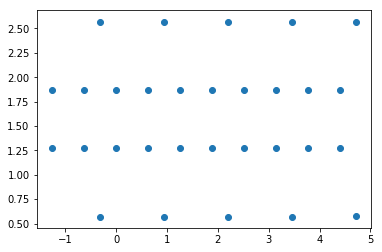

In [101]:
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))))


In [99]:
print(np.sum(np.isnan(x1)))
print(np.sum(np.isnan(y1)))
print(np.sum(np.isnan(z1)))

print(np.sum(np.isnan(theta1)))
print(np.sum(np.isnan(phi1)))

print(x1[np.isnan(theta1)])
print(y1[np.isnan(theta1)])
print(z1[np.isnan(theta1)])

0
0
0
1
1
[0.]
[0.]
[0.]


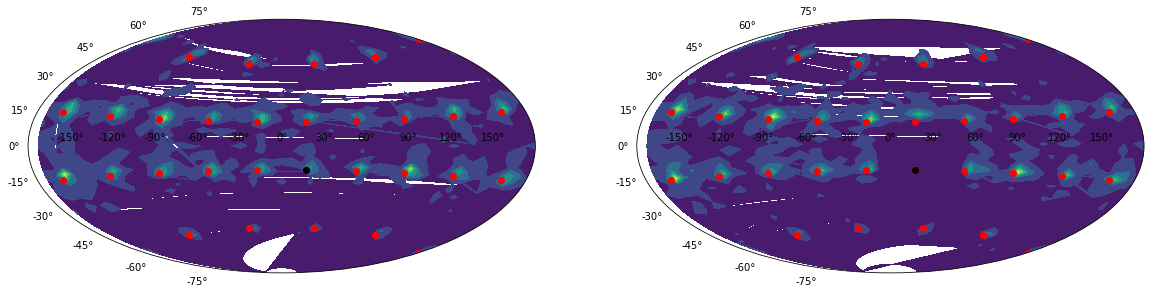

In [177]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1,projection="aitoff")
H1, xedges, yedges = np.histogram2d(phi2-np.pi/2, theta2-np.pi/2, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi - np.pi/2, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))) - np.pi/2,\
           c='red')
plt.scatter(np.arctan(PMT_pos[shut,1]/(PMT_pos[shut,0]+1e-3)) + (PMT_pos[shut,0]>=0)*np.pi- np.pi/2, \
            np.arccos(PMT_pos[shut,2]/np.sqrt(np.sum(PMT_pos[shut,:]**2)))- np.pi/2,\
           c='black')

plt.subplot(1,2,2,projection="aitoff")
H2, xedges, yedges = np.histogram2d(phi1- np.pi/2, theta1- np.pi/2, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H2))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi- np.pi/2, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1)))- np.pi/2,\
           c='red')
plt.scatter(np.arctan(PMT_pos[shut,1]/(PMT_pos[shut,0]+1e-3)) + (PMT_pos[shut,0]>=0)*np.pi- np.pi/2, \
            np.arccos(PMT_pos[shut,2]/np.sqrt(np.sum(PMT_pos[shut,:]**2)))- np.pi/2,\
           c='black')
plt.show()

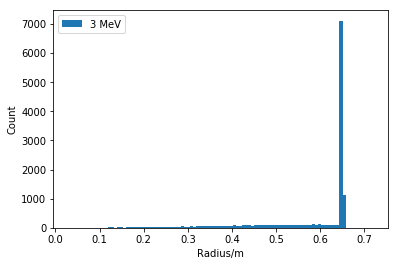

In [184]:
plt.figure(1)
r = np.sqrt(x1**2 + y1**2 +z1**2)
plt.hist(r, bins=100)
plt.legend(["3 MeV","2.5 MeV","2 MeV","1.5 MeV","1 MeV","0.5 MeV"])
plt.xlabel('Radius/m')
plt.ylabel('Count')
plt.show()

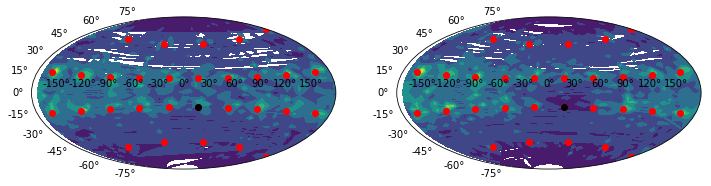

In [175]:
%matplotlib inline
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1,projection="aitoff")
H, xedges, yedges = np.histogram2d(phi3 - np.pi/2, theta3 - np.pi/2, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi - np.pi/2, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))) - np.pi/2,\
           c='red')
plt.scatter(np.arctan(PMT_pos[shut,1]/(PMT_pos[shut,0]+1e-3)) + (PMT_pos[shut,0]>=0)*np.pi - np.pi/2, \
            np.arccos(PMT_pos[shut,2]/np.sqrt(np.sum(PMT_pos[0,:]**2))) - np.pi/2,\
           c='black')

plt.subplot(1,2,2,projection="aitoff")
H, xedges, yedges = np.histogram2d(phi4 - np.pi/2, theta4 - np.pi/2, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi - np.pi/2, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))) - np.pi/2,\
           c='red')
plt.scatter(np.arctan(PMT_pos[shut,1]/(PMT_pos[shut,0]+1e-3)) + (PMT_pos[shut,0]>=0)*np.pi - np.pi/2, \
            np.arccos(PMT_pos[shut,2]/np.sqrt(np.sum(PMT_pos[shut,:]**2))) - np.pi/2,\
           c='black')

In [133]:
def plot_figure(shut):
    filename = './shut'+str(shut)+'.h5'
    h = tables.open_file(filename,'r')
    recondata = h.root.Recon
    h1 = tables.open_file('./temp0.h5','r')
    recondata1 = h1.root.Recon
    ## ML
    # normal
    x1 = recondata[:]['x1']
    y1 = recondata[:]['y1']
    z1 = recondata[:]['z1']
    # shut
    x2 = recondata1[:]['x1']
    y2 = recondata1[:]['y1']
    z2 = recondata1[:]['z1']
    ## weighted average
    # normal
    x3 = recondata[:]['x3']
    y3 = recondata[:]['y3']
    z3 = recondata[:]['z3']
    # shut
    x4 = recondata[:]['x4']
    y4 = recondata[:]['y4']
    z4 = recondata[:]['z4']

    x1[np.isnan(x1)]=0
    y1[np.isnan(y1)]=0
    z1[np.isnan(z1)]=0

    x2[np.isnan(x2)]=0
    y2[np.isnan(y2)]=0
    z2[np.isnan(z2)]=0

    x3[np.isnan(x3)]=0
    y3[np.isnan(y3)]=0
    z3[np.isnan(z3)]=0

    x4[np.isnan(x4)]=0
    y4[np.isnan(y4)]=0
    z4[np.isnan(z4)]=0

    r1 = np.sqrt(x1**2 + y1**2 + z1**2)
    r2 = np.sqrt(x2**2 + y2**2 + z2**2)
    r3 = np.sqrt(x3**2 + y3**2 + z3**2)
    r4 = np.sqrt(x4**2 + y4**2 + z4**2)

    theta1 = np.arccos(z1/(r1+1e-4))
    theta2 = np.arccos(z2/(r2+1e-4))
    theta3 = np.arccos(z3/(r3+1e-4))
    theta4 = np.arccos(z4/(r4+1e-4))

    phi1 = np.arctan(y1/(x1+1e-4)) + (x1>0)*np.pi
    phi2 = np.arctan(y2/(x2+1e-4)) + (x2>0)*np.pi
    phi3 = np.arctan(y3/(x3+1e-4)) + (x3>0)*np.pi
    phi4 = np.arctan(y4/(x4+1e-4)) + (x4>0)*np.pi
    
    PMT_pos = ReadPMT()
    %matplotlib inline
    fig = plt.figure(figsize=(20,20))
    plt.subplot(2,2,1)
    H1, xedges, yedges = np.histogram2d(phi1, theta1, bins=50)
    X, Y = np.meshgrid(xedges[1:],yedges[1:])
    plt.contourf(X,Y,np.transpose(H1))
    plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
                np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))),\
               c='red')
    plt.scatter(np.arctan(PMT_pos[shut,1]/(PMT_pos[shut,0]+1e-3)) + (PMT_pos[shut,0]>=0)*np.pi, \
                np.arccos(PMT_pos[shut,2]/np.sqrt(np.sum(PMT_pos[shut,:]**2))),\
               c='black')

    plt.subplot(2,2,2)
    H2, xedges, yedges = np.histogram2d(phi2, theta2, bins=50)
    X, Y = np.meshgrid(xedges[1:],yedges[1:])
    plt.contourf(X,Y,np.transpose(H2))
    plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
                np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))),\
               c='red')
    plt.scatter(np.arctan(PMT_pos[shut,1]/(PMT_pos[shut,0]+1e-3)) + (PMT_pos[shut,0]>=0)*np.pi, \
                np.arccos(PMT_pos[shut,2]/np.sqrt(np.sum(PMT_pos[shut,:]**2))),\
               c='black')
    
    plt.subplot(2,2,3)
    H, xedges, yedges = np.histogram2d(phi3, theta3, bins=50)
    X, Y = np.meshgrid(xedges[1:],yedges[1:])
    plt.contourf(X,Y,np.transpose(H))
    plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
                np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))),\
               c='red')
    plt.scatter(np.arctan(PMT_pos[shut,1]/(PMT_pos[shut,0]+1e-3)) + (PMT_pos[shut,0]>=0)*np.pi, \
                np.arccos(PMT_pos[shut,2]/np.sqrt(np.sum(PMT_pos[0,:]**2))),\
               c='black')

    plt.subplot(2,2,4)
    H, xedges, yedges = np.histogram2d(phi4, theta4, bins=50)
    X, Y = np.meshgrid(xedges[1:],yedges[1:])
    plt.contourf(X,Y,np.transpose(H))
    plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
                np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))),\
               c='red')
    plt.scatter(np.arctan(PMT_pos[shut,1]/(PMT_pos[shut,0]+1e-3)) + (PMT_pos[shut,0]>=0)*np.pi, \
                np.arccos(PMT_pos[shut,2]/np.sqrt(np.sum(PMT_pos[shut,:]**2))),\
               c='black')
    return x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4

/home/orv/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in true_divide


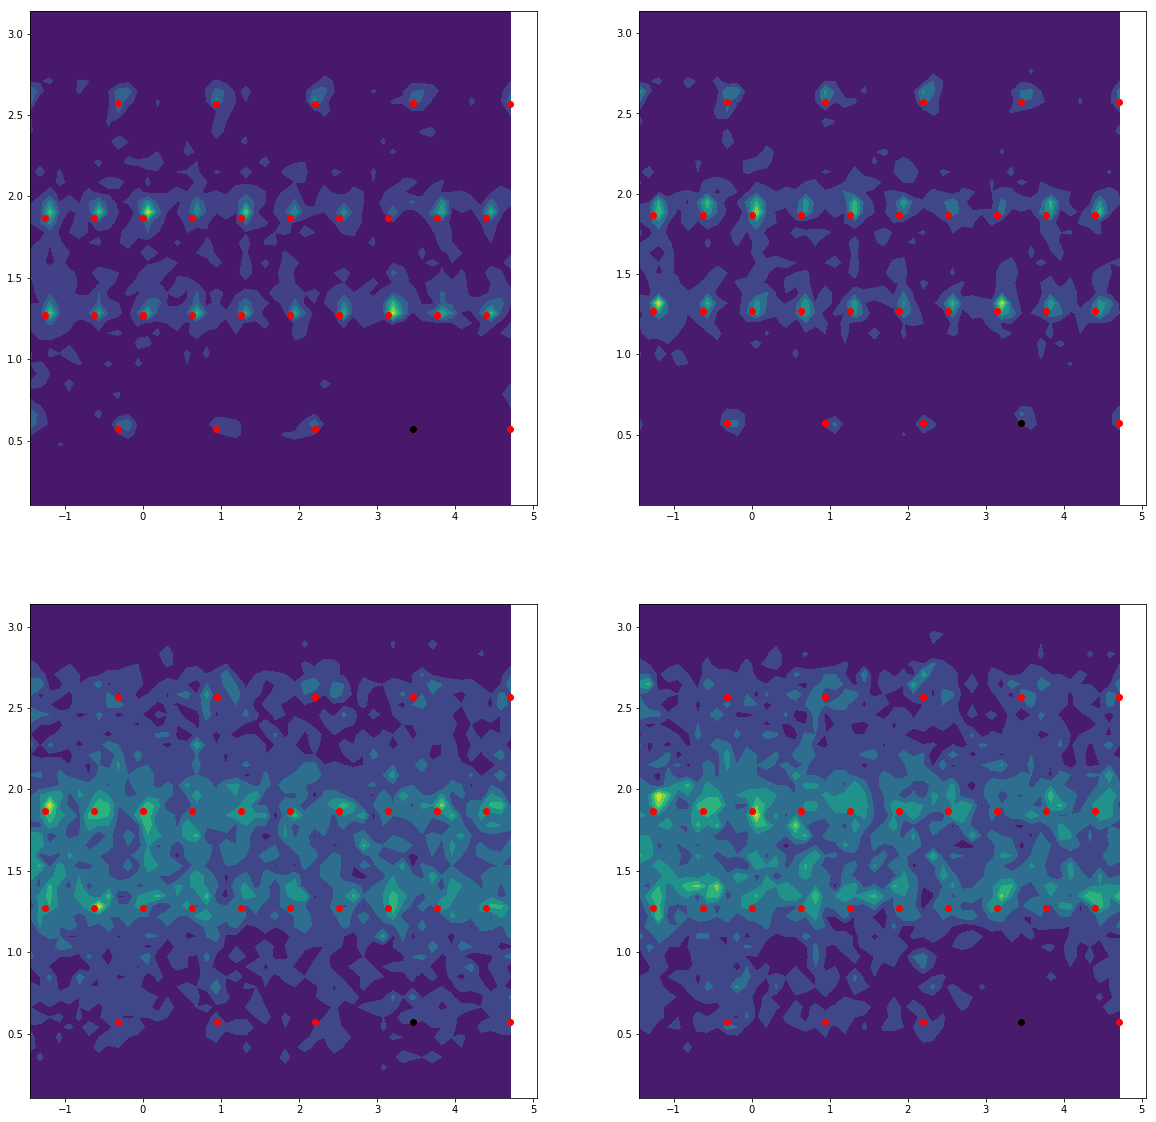

In [131]:
plot_figure(0)

/home/orv/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in true_divide


(array([-0.456 ,  0.545 ,  0.6265, ..., -0.2444,  0.628 , -0.2429],
       dtype=float16),
 array([ 0.0368 , -0.2974 ,  0.06274, ...,  0.495  , -0.1434 ,  0.188  ],
       dtype=float16),
 array([-0.1544 ,  0.1921 ,  0.06073, ...,  0.343  ,  0.0887 ,  0.0691 ],
       dtype=float16),
 array([-0.443 ,  0.5264,  0.5767, ..., -0.2443,  0.6206, -0.2095],
       dtype=float16),
 array([ 0.02055, -0.326  ,  0.02432, ...,  0.4934 , -0.1696 ,  0.1447 ],
       dtype=float16),
 array([-0.1501,  0.1987,  0.0846, ...,  0.3455,  0.0919,  0.0697],
       dtype=float16),
 array([-0.2325,  0.2488,  0.3237, ..., -0.1108,  0.3018, -0.1107],
       dtype=float16),
 array([ 0.02371, -0.1256 ,  0.0184 , ...,  0.2456 , -0.1659 ,  0.0832 ],
       dtype=float16),
 array([-0.05637,  0.08527,  0.0807 , ...,  0.145  ,  0.0903 ,  0.0458 ],
       dtype=float16),
 array([-0.2438 ,  0.249  ,  0.3281 , ..., -0.11487,  0.305  , -0.1284 ],
       dtype=float16),
 array([ 0.04202, -0.09595,  0.0607 , ...,  0.257  , -

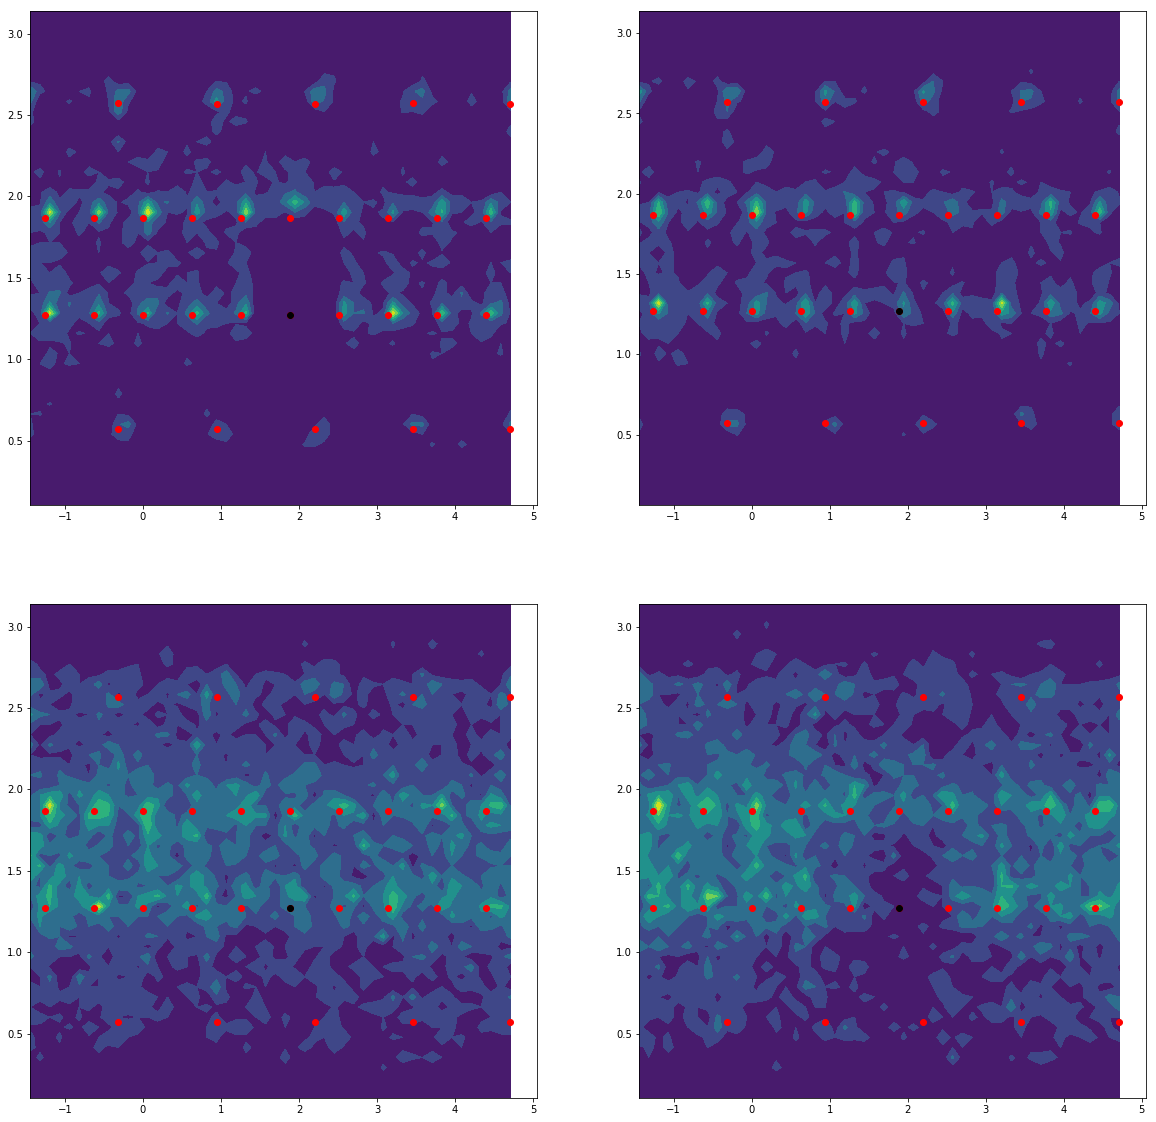

In [134]:
plot_figure(11)

In [148]:
a = np.array((1,2,np.nan,4,5))

a[~np.isnan(a)]

array([1., 2., 4., 5.])

0 False


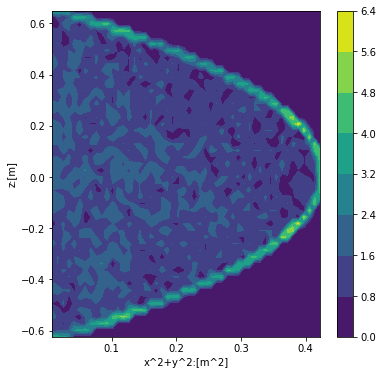

In [172]:
plt.figure(figsize = (6,6))

r1 = x1**2 + y1**2
z_new = z1

print(np.sum(r1>0.7),np.sum(z_new)>0.7)
H1, xedges, yedges = np.histogram2d(r1, z_new, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.log(np.transpose(H1)+1))
plt.xlabel('x^2+y^2:[m^2]')
plt.ylabel('z:[m]')
plt.colorbar()
plt.show()

0 False


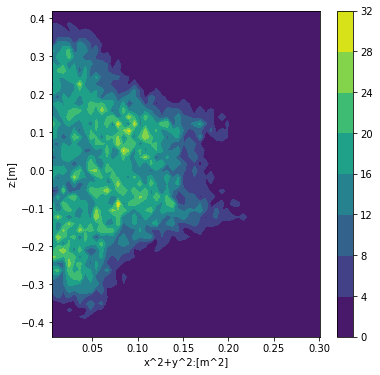

In [174]:
plt.figure(figsize = (6,6))

r1 = x3**2 + y3**2
z_new = z3

print(np.sum(r1>0.7),np.sum(z_new)>0.7)
H1, xedges, yedges = np.histogram2d(r1, z_new, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))
plt.xlabel('x^2+y^2:[m^2]')
plt.ylabel('z:[m]')
plt.colorbar()
plt.show()
